# Законы распределения дискретных случайных величин

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, geom, hypergeom

np.set_printoptions(formatter={'float_kind': '{:0.4f}'.format})
pd.options.display.float_format = '{:,.4f}'.format

## Задача (биномиальный закон распределения)

В секретной лаборатории бабушка проводит эксперименты по телепортации внуков. Каждый день она пытается телепортировать одного из своих 10 внуков в параллельную вселенную. Вероятность успешного телепорта равна 0.7. Составить закон распределения числа успешных телепортаций за 5 дней. Найти математическое ожидание, дисперсию, среднее квадратичное отклонение и моду. Построить многоугольник распределения.

In [19]:
n, p = 5, 0.7
X = np.arange(0, n + 1)

binomial_dist = binom(n, p)
probabilities = binomial_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])
df

,0,1,2,3,4,5
p,0.0024,0.0283,0.1323,0.3087,0.3601,0.1681


In [20]:
print(f'Математическое ожидание = {binomial_dist.mean():.4f}')
print(f'Дисперсия = {binomial_dist.var():.4f}')
print(f'Стандартное отклонение = {binomial_dist.std():.4f}')

max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x], 6) == round(max_prob, 6)]
print(f'Мода = {mode}')

Математическое ожидание = 3.5000
Дисперсия = 1.0500
Стандартное отклонение = 1.0247
Мода = [4]


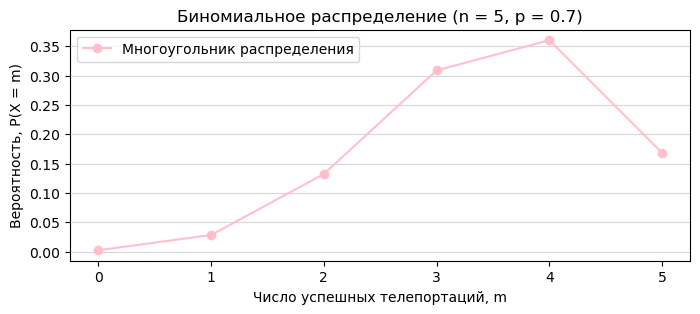

In [21]:
plt.figure(figsize=(8, 3))
plt.plot(X, probabilities, marker='o', linestyle='-', color='pink', label='Многоугольник распределения')
plt.title(f'Биномиальное распределение (n = {n}, p = {p})')
plt.xlabel('Число успешных телепортаций, m')
plt.ylabel('Вероятность, P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()

## Задача (закон распределения Пуассона)

На борту международной космической станции живёт колония из 10 000 муравьёв. Каждый муравей за сутки с вероятностью 0.0002 нечаянно улетает в вентиляционную шахту и пропадает без вести. Составить закон распределения числа пропавших муравьёв за сутки. Найти математическое ожидание, дисперсию, среднее квадратичное отклонение и моду. Построить многоугольник распределения.

In [5]:
n, p = 10000, 0.0002
lmb = n * p

X = np.arange(0, 10)

poisson_dist = poisson(lmb)
probabilities = poisson_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])
df

,0,1,2,3,4,5,6,7,8,9
p,0.135335,0.270671,0.270671,0.180447,0.090224,0.036089,0.01203,0.003437,0.000859,0.000191


In [6]:
print(f'Математическое ожидание = {poisson_dist.mean():.4f}')
print(f'Дисперсия = {poisson_dist.var():.4f}')
print(f'Стандартное отклонение = {poisson_dist.std():.4f}')

max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x], 6) == round(max_prob, 6)]
print(f'Мода = {mode}')

Математическое ожидание = 2.0000
Дисперсия = 2.0000
Стандартное отклонение = 1.4142
Мода = [1, 2]


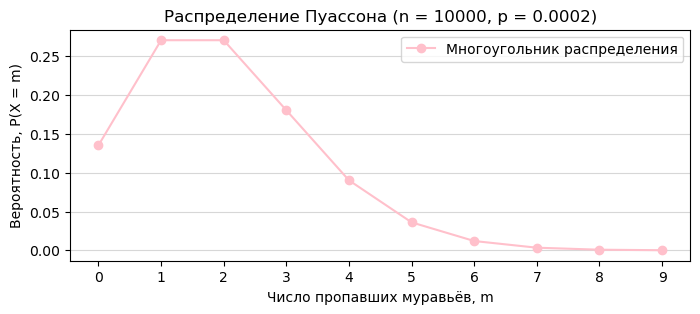

In [7]:
plt.figure(figsize=(8, 3))
plt.plot(X, probabilities, marker='o', linestyle='-', color='pink', label='Многоугольник распределения')
plt.title(f'Распределение Пуассона (n = {n}, p = {p})')
plt.xlabel('Число пропавших муравьёв, m')
plt.ylabel('Вероятность, P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()

## Задача (геометрический закон распределения)

Рыцарь Артур пытается активировать волшебный меч, ударяя им по камню. Вероятность того, что меч активируется при одном ударе, равна 0.15. Меч активируется только при первом успешном ударе, после чего больше не нуждается в ударах. Составить закон распределения числа ударов до первого успеха. Найти математическое ожидание, дисперсию, среднее квадратичное отклонение и моду. Построить многоугольник распределения.

In [22]:
p = 0.15

X = np.arange(1, 11)
geom_dist = geom(p)
probabilities = geom_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])
df

,1,2,3,4,5,6,7,8,9,10
p,0.1500,0.1275,0.1084,0.0921,0.0783,0.0666,0.0566,0.0481,0.0409,0.0347


In [24]:
print(f'Математическое ожидание = {geom_dist.mean():.4f}')
print(f'Дисперсия = {geom_dist.var():.4f}')
print(f'Стандартное отклонение = {geom_dist.std():.4f}')

max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x - 1], 6) == round(max_prob, 6)]
print(f'Мода = {mode}')

Математическое ожидание = 6.6667
Дисперсия = 37.7778
Стандартное отклонение = 6.1464
Мода = [1]


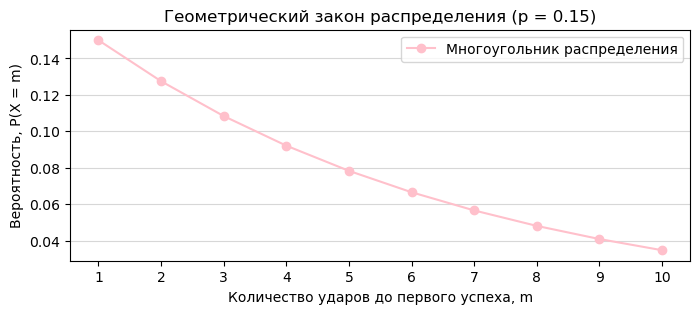

In [25]:
plt.figure(figsize=(8, 3))
plt.plot(X, probabilities, marker='o', linestyle='-', color='pink', label='Многоугольник распределения')
plt.title(f'Геометрический закон распределения (p = {p})')
plt.xlabel('Количество ударов до первого успеха, m')
plt.ylabel('Вероятность, P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()

## Задача (гипергеометрический закон распределения)

В кофейном автомате есть 20 чашек: 8 – с настоящим кофе, 12 – с водой. Студент берёт 5 чашек наугад (без возврата). Составить закон распределения числа чашек с настоящим кофе среди 5 выбранных. Найти математическое ожидание, дисперсию, среднее квадратичное отклонение и моду. Построить многоугольник распределения.

In [26]:
N, M, n = 20, 8, 5

X = np.arange(0, n + 1)
hypergeom_dist = hypergeom(N, M, n)
probabilities = hypergeom_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])
df

,0,1,2,3,4,5
p,0.0511,0.2554,0.3973,0.2384,0.0542,0.0036


In [28]:
print(f'Математическое ожидание = {hypergeom_dist.mean():.4f}')
print(f'Дисперсия = {hypergeom_dist.var():.4f}')
print(f'Стандартное отклонение = {hypergeom_dist.std():.4f}')

max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x - 1], 6) == round(max_prob, 6)]
print(f'Мода = {mode}')

Математическое ожидание = 2.0000
Дисперсия = 0.9474
Стандартное отклонение = 0.9733
Мода = [3]


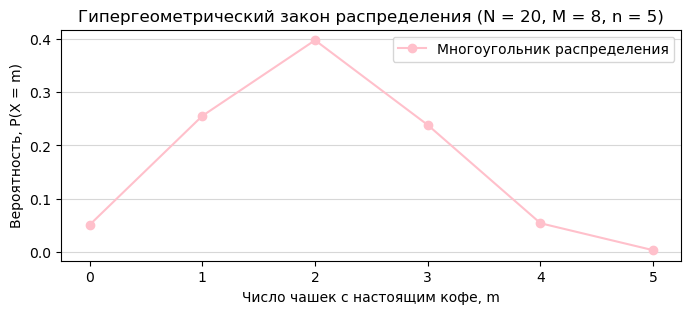

In [29]:
plt.figure(figsize=(8, 3))
plt.plot(X, probabilities, marker='o', linestyle='-', color='pink', label='Многоугольник распределения')
plt.title(f'Гипергеометрический закон распределения (N = {N}, M = {M}, n = {n})')
plt.xlabel('Число чашек с настоящим кофе, m')
plt.ylabel('Вероятность, P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()